In [2]:
import pandas as pd

# URL of the dataset
url = "https://raw.githubusercontent.com/hamzaben86/Employee-Churn-Predictive-Model/master/Data/WA_Fn-UseC_-HR-Employee-Attrition.xlsx"

# Read the dataset using pandas
data = pd.read_excel(url)

# Display the data in a tabular format
pd.set_option('display.max_columns', None)  # To display all columns
print(data)

      Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0       

In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

# Data preprocessing
# Perform any necessary data cleaning and feature engineering

# Columns to remove
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Remove irrelevant columns
data = data.drop(columns_to_remove, axis=1)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop("Attrition_Yes", axis=1)  # Assuming "Attrition_Yes" is the encoded column for "Attrition" with 'Yes' indicating attrition
y = data_encoded["Attrition_Yes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Principal Component Analysis (PCA)
pca = PCA(n_components=10)  # Selecting top 10 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature selection using Information Gain
selector_ig = SelectKBest(score_func=mutual_info_classif, k=10)  # Selecting top 10 features based on information gain
X_train_ig = selector_ig.fit_transform(X_train, y_train)
X_test_ig = selector_ig.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()  # RF classifier for RFE
selector_rfe = RFE(rf_classifier, n_features_to_select=10)  # Selecting top 10 features using RFE
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RF Accuracy Score (Original Features):", rf_accuracy)

# Initialize and train the Random Forest classifier with PCA-selected features
rf_classifier_pca = RandomForestClassifier()
rf_classifier_pca.fit(X_train_pca, y_train)
rf_predictions_pca = rf_classifier_pca.predict(X_test_pca)
rf_accuracy_pca = accuracy_score(y_test, rf_predictions_pca)
print("RF Accuracy Score (PCA-selected Features):", rf_accuracy_pca)

# Initialize and train the Random Forest classifier with IG-selected features
rf_classifier_ig = RandomForestClassifier()
rf_classifier_ig.fit(X_train_ig, y_train)
rf_predictions_ig = rf_classifier_ig.predict(X_test_ig)
rf_accuracy_ig = accuracy_score(y_test, rf_predictions_ig)
print("RF Accuracy Score (IG-selected Features):", rf_accuracy_ig)

# Initialize and train the Random Forest classifier with RFE-selected features
rf_classifier_rfe = RandomForestClassifier()
rf_classifier_rfe.fit(X_train_rfe, y_train)
rf_predictions_rfe = rf_classifier_rfe.predict(X_test_rfe)
rf_accuracy_rfe = accuracy_score(y_test, rf_predictions_rfe)
print("RF Accuracy Score (RFE-selected Features):", rf_accuracy_rfe)

RF Accuracy Score (Original Features): 1.0
RF Accuracy Score (PCA-selected Features): 0.8605442176870748
RF Accuracy Score (IG-selected Features): 1.0
RF Accuracy Score (RFE-selected Features): 1.0


RF Accuracy Score (Original Features): 1.0
RF Accuracy Score (PCA-selected Features): 0.8673469387755102
RF Accuracy Score (IG-selected Features): 1.0
RF Accuracy Score (RFE-selected Features): 1.0


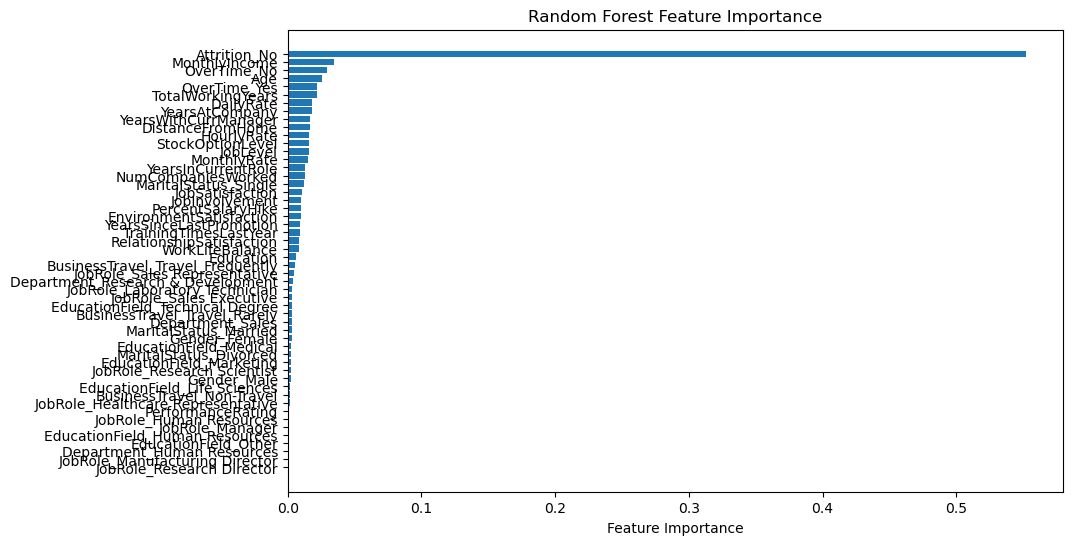

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

# Load the dataset
data = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

# Data preprocessing
# Perform any necessary data cleaning and feature engineering

# Columns to remove
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Remove irrelevant columns
data = data.drop(columns_to_remove, axis=1)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop("Attrition_Yes", axis=1)  # Assuming "Attrition_Yes" is the encoded column for "Attrition" with 'Yes' indicating attrition
y = data_encoded["Attrition_Yes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Principal Component Analysis (PCA)
pca = PCA(n_components=10)  # Selecting top 10 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature selection using Information Gain
selector_ig = SelectKBest(score_func=mutual_info_classif, k=10)  # Selecting top 10 features based on information gain
X_train_ig = selector_ig.fit_transform(X_train, y_train)
X_test_ig = selector_ig.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()  # RF classifier for RFE
selector_rfe = RFE(rf_classifier, n_features_to_select=10)  # Selecting top 10 features using RFE
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RF Accuracy Score (Original Features):", rf_accuracy)

# Initialize and train the Random Forest classifier with PCA-selected features
rf_classifier_pca = RandomForestClassifier()
rf_classifier_pca.fit(X_train_pca, y_train)

# Make predictions on the test set using PCA-selected features
rf_predictions_pca = rf_classifier_pca.predict(X_test_pca)

# Calculate accuracy score for PCA-selected features
rf_accuracy_pca = accuracy_score(y_test, rf_predictions_pca)
print("RF Accuracy Score (PCA-selected Features):", rf_accuracy_pca)

# Initialize and train the Random Forest classifier with IG-selected features
rf_classifier_ig = RandomForestClassifier()
rf_classifier_ig.fit(X_train_ig, y_train)

# Make predictions on the test set using IG-selected features
rf_predictions_ig = rf_classifier_ig.predict(X_test_ig)

# Calculate accuracy score for IG-selected features
rf_accuracy_ig = accuracy_score(y_test, rf_predictions_ig)
print("RF Accuracy Score (IG-selected Features):", rf_accuracy_ig)

# Initialize and train the Random Forest classifier with RFE-selected features
rf_classifier_rfe = RandomForestClassifier()
rf_classifier_rfe.fit(X_train_rfe, y_train)

# Make predictions on the test set using RFE-selected features
rf_predictions_rfe = rf_classifier_rfe.predict(X_test_rfe)

# Calculate accuracy score for RFE-selected features
rf_accuracy_rfe = accuracy_score(y_test, rf_predictions_rfe)
print("RF Accuracy Score (RFE-selected Features):", rf_accuracy_rfe)

# Feature importance plotting
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns.values
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_indices])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()

In [17]:
# Top 10 Features 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE

# Load the dataset
data = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

# Data preprocessing
# Perform any necessary data cleaning and feature engineering

# Columns to remove
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Remove irrelevant columns
data = data.drop(columns_to_remove, axis=1)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop("Attrition_Yes", axis=1)  # Assuming "Attrition_Yes" is the encoded column for "Attrition" with 'Yes' indicating attrition
y = data_encoded["Attrition_Yes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

# Feature importance
feature_importance = rf_classifier.feature_importances_
feature_names = X.columns.values
sorted_indices = np.argsort(feature_importance)

# Display top 10 features based on importance
top_10_features = feature_names[sorted_indices][-10:]
print("Top 10 Features based on Importance:")
for feature in top_10_features:
    print(feature)

# Make predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy score
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("RF Accuracy Score (Original Features):", rf_accuracy)

Top 10 Features based on Importance:
DistanceFromHome
MonthlyRate
DailyRate
TotalWorkingYears
YearsAtCompany
Age
OverTime_No
OverTime_Yes
MonthlyIncome
Attrition_No
RF Accuracy Score (Original Features): 1.0


C:\Users\sspko\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sspko\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid thi

Feature Selection Method               Logistic Regression    Random Forest    Gradient Boosting    Decision Tree    K-Nearest Neighbors
-----------------------------------  ---------------------  ---------------  -------------------  ---------------  ---------------------
Principal Component Analysis (PCA)                  76.19%           86.39%               84.35%           77.55%                 84.69%
Information Gain (IG)                               97.96%          100.00%              100.00%          100.00%                 84.01%
Recursive Feature Elimination (RFE)                 91.16%          100.00%              100.00%          100.00%                 84.35%


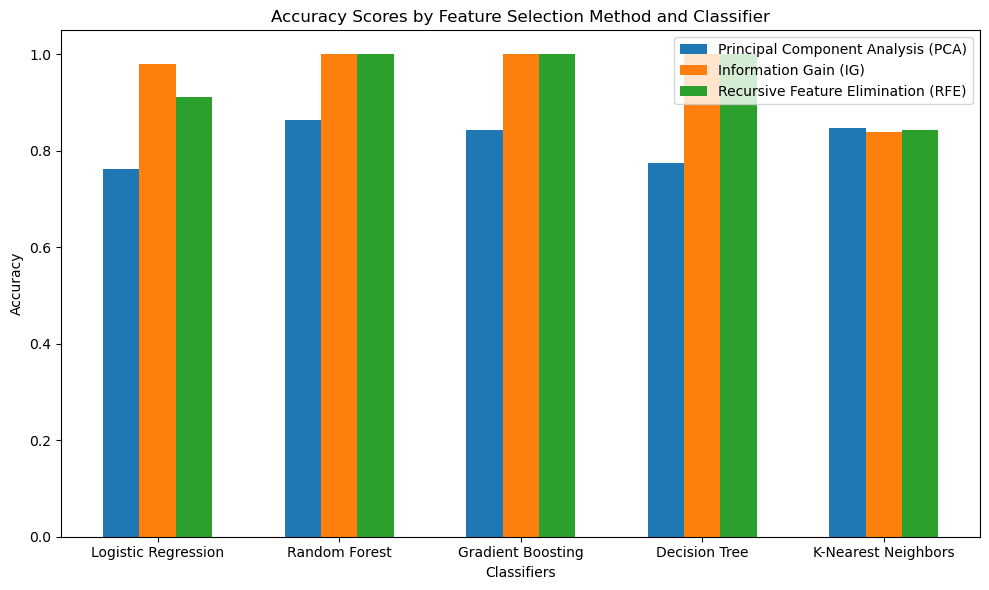

In [21]:
## Compare and contrast the accuracy result with different feature selection methods and algorithms 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from tabulate import tabulate

# Load the dataset
data = pd.read_excel("WA_Fn-UseC_-HR-Employee-Attrition.xlsx")

# Data preprocessing
# Perform any necessary data cleaning and feature engineering

# Columns to remove
columns_to_remove = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

# Remove irrelevant columns
data = data.drop(columns_to_remove, axis=1)

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data)

# Split the data into features (X) and target variable (y)
X = data_encoded.drop("Attrition_Yes", axis=1)  # Assuming "Attrition_Yes" is the encoded column for "Attrition" with 'Yes' indicating attrition
y = data_encoded["Attrition_Yes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature selection using Principal Component Analysis (PCA)
pca = PCA(n_components=10)  # Selecting top 10 principal components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Feature selection using Information Gain
selector_ig = SelectKBest(score_func=mutual_info_classif, k=10)  # Selecting top 10 features based on information gain
X_train_ig = selector_ig.fit_transform(X_train, y_train)
X_test_ig = selector_ig.transform(X_test)

# Feature selection using Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier()  # RF classifier for RFE
selector_rfe = RFE(rf_classifier, n_features_to_select=10)  # Selecting top 10 features using RFE
X_train_rfe = selector_rfe.fit_transform(X_train, y_train)
X_test_rfe = selector_rfe.transform(X_test)

# Initialize and train the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

feature_selection_methods = {
    "Principal Component Analysis (PCA)": (X_train_pca, X_test_pca),
    "Information Gain (IG)": (X_train_ig, X_test_ig),
    "Recursive Feature Elimination (RFE)": (X_train_rfe, X_test_rfe)
}

accuracy_scores = []

for feature_method, (X_train_selected, X_test_selected) in feature_selection_methods.items():
    row = [feature_method]
    for classifier_name, classifier in classifiers.items():
        classifier.fit(X_train_selected, y_train)
        y_pred = classifier.predict(X_test_selected)
        accuracy = accuracy_score(y_test, y_pred)
        row.append(accuracy)
    accuracy_scores.append(row)

# Print results in a table
headers = ["Feature Selection Method"] + list(classifiers.keys())
print(tabulate(accuracy_scores, headers=headers, floatfmt=".2%"))

# Plot accuracy scores in a chart
classifiers_names = list(classifiers.keys())
x = np.arange(len(classifiers_names))
width = 0.2

plt.figure(figsize=(10, 6))
for i, (method, scores) in enumerate(zip(feature_selection_methods.keys(), accuracy_scores)):
    plt.bar(x + i * width, scores[1:], width, label=method)

plt.xlabel("Classifiers")
plt.ylabel("Accuracy")
plt.title("Accuracy Scores by Feature Selection Method and Classifier")
plt.xticks(x + width * (len(feature_selection_methods) / 2 - 0.5), classifiers_names)
plt.legend()
plt.tight_layout()
plt.show()